In [1]:
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [332]:
storms_list = []
for i in range(4000,8500):
    a = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
    storms_list.append(a)

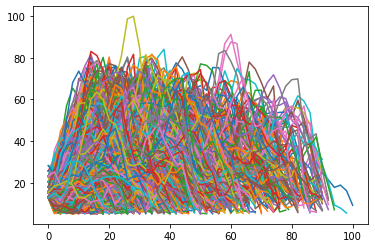

In [335]:
for i in range(len(storms_list)):
    plt.plot(storms_list[i][:,3])

In [338]:
maxmwrs = []
minmwrs = []
for i in range(len(storms_list)):
    maxmwrs.append(np.nanmax(storms_list[i][:,3]))
    minmwrs.append(np.nanmin(storms_list[i][:,3]))

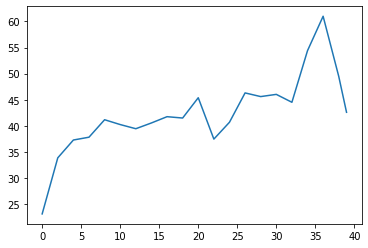

In [345]:
i = np.argmax(minmwrs)
plt.plot(storms_list[i][:,3])

In [2]:
peaks = np.loadtxt('../peaks3_05.txt')

(array([3.045e+03, 7.740e+02, 2.740e+02, 1.110e+02, 6.200e+01, 2.700e+01,
        9.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([9.92827300e-05, 1.46316754e-01, 2.92534226e-01, 4.38751698e-01,
        5.84969170e-01, 7.31186641e-01, 8.77404113e-01, 1.02362158e+00,
        1.16983906e+00, 1.31605653e+00, 1.46227400e+00]),
 <BarContainer object of 10 artists>)

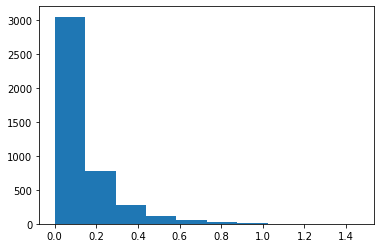

In [4]:
plt.hist(peaks[peaks>0.0])

In [10]:
print(np.arange(len(peaks))[peaks>1.0]+4000)

[5845 7035]


In [11]:
peaks[3035:3040]

array([1.462274  , 0.2003806 , 0.3278439 , 0.04925786, 0.05110785])

In [12]:
peaks[1845:1850]

array([1.297216 , 0.1414938, 0.5511805, 0.7139416, 0.1084802])

In [42]:
nyc = np.array([360-74.0060,40.7128])

0.09585107
0.2946806
0.2704763
1.297216
0.1414938
0.5511805
0.7139416
0.1084802
0.6047331
0.2301346
0.7601544
0.9430206
0.228186


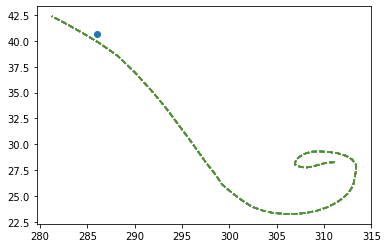

In [366]:
for i in range(5842,5855):
    a = storms_list[i-4000]
    plt.plot(a[:,1],a[:,2],'--')
    print(peaks[i-4000])
plt.scatter(nyc[0],nyc[1])

In [21]:
len(peaks)

4500

In [71]:
max_mws = []
#mean_mws = []
min_mwr = []
#mean_mwr = []
min_cp = []
#mean
for i in range(4000,8500):
    a = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
    max_mws.append(np.nanmax(a[:,3]))
    min_mwr.append(np.nanmin(a[:,4]))
    min_cp.append(np.nanmin(a[:,5]))


In [72]:
max_mws = np.array(max_mws)
min_mwr = np.array(min_mwr)
min_cp = np.array(min_cp)

In [73]:
non0 = peaks>0.0

In [106]:
weight_fun = lambda coords : np.exp(-0.1*np.sum((coords-nyc)**2))

(array([ 136.,  354.,  907., 1573.,  910.,  334.,  226.,   33.,   18.,
           9.]),
 array([-2.30653417, -1.38379003, -0.46104589,  0.46169826,  1.3844424 ,
         2.30718654,  3.22993068,  4.15267482,  5.07541896,  5.9981631 ,
         6.92090724]),
 <BarContainer object of 10 artists>)

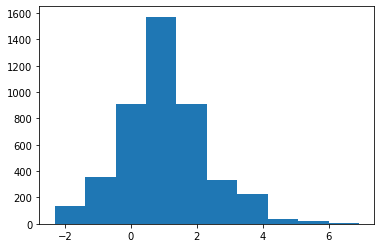

In [107]:
ks_zonal_wind = []
for i in range(4000,8500):
    #if i%100 == 0:
    #    print(i)
    a = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
    zonal_wind_sum = 0
    weight_sum = 0
    for j in range(len(a)-1):
        weight = weight_fun(a[j,1:3])
        zonal_wind_sum += (a[j+1,1]-a[j,1])*weight
        weight_sum += weight
    zonal_wind_sum = zonal_wind_sum/weight_sum
    ks_zonal_wind.append(zonal_wind_sum)
ks_zonal_wind = np.array(ks_zonal_wind)
plt.hist(ks_zonal_wind)

In [327]:
ks_meridional_wind = []
ks_zonal_wind = []
ks_mws = []
ks_mwr = []
ks_cp = []
for i in range(4000,8501):
    if i%1000 == 0:
        print(i)
    if i == 8500:
        a = np.loadtxt("../sandy.storm",skiprows = 3)
        a[:,1] = 360 + a[:,1]
    else:
         a = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
    meridional_wind_sum = 0
    zonal_wind_sum = 0
    mws_sum = 0
    mwr_sum = 0
    cp_sum = 0
    
    weight_sum = 0
    for j in range(len(a)-1):
        weight = weight_fun(a[j,1:3])
        weight_sum += weight
        zonal_wind_sum += (a[j+1,2]-a[j,2])*weight
    zonal_wind_sum = zonal_wind_sum/weight_sum
    ks_zonal_wind.append(zonal_wind_sum)
    
    weight_sum = 0
    for j in range(len(a)-1):
        weight = weight_fun(a[j,1:3])
        weight_sum += weight
        meridional_wind_sum += (a[j+1,2]-a[j,2])*weight
    meridional_wind_sum = meridional_wind_sum/weight_sum
    ks_meridional_wind.append(meridional_wind_sum)
    
    weight_sum = 0
    for j in range(len(a)):
        if a[j,3] > 0.0:
            weight = weight_fun(a[j,1:3])
            weight_sum += weight
            mws_sum += a[j,3]*weight
    ks_mws.append(mws_sum/weight_sum)
    
    weight_sum = 0
    for j in range(len(a)):
        if a[j,4] > 0.0:
            weight = weight_fun(a[j,1:3])
            weight_sum += weight
            mwr_sum += a[j,4]*weight
    ks_mwr.append(mwr_sum/weight_sum)
    
    weight_sum = 0
    for j in range(len(a)):
        if a[j,5] > 0.0:
            weight = weight_fun(a[j,1:3])
            weight_sum += weight
            cp_sum += a[j,5]*weight
    ks_cp.append(cp_sum/weight_sum)
 


4000
5000
6000
7000
8000


In [328]:
sandy_meridional_wind = ks_meridional_wind[-1]
sandy_zonal_wind = ks_zonal_wind[-1]
sandy_mws = ks_mws[-1]
sandy_mwr = ks_mwr[-1]
sandy_cp = ks_cp[-1]
sandy_params = np.array([sandy_mws,sandy_mwr,sandy_cp,sandy_meridional_wind,sandy_zonal_wind])

ks_meridional_wind = np.array(ks_meridional_wind)[:-1]
ks_zonal_wind = np.array(ks_zonal_wind)[:-1]
ks_mws = np.array(ks_mws)[:-1]
ks_mwr = np.array(ks_mwr)[:-1]
ks_cp = np.array(ks_cp)[:-1]

In [82]:
np.max(np.nan,0)

nan

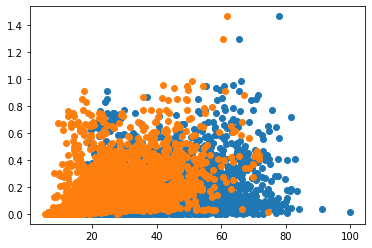

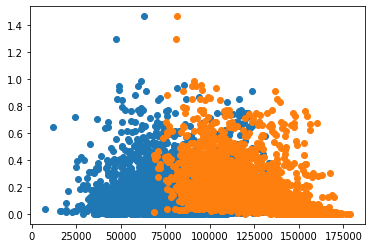

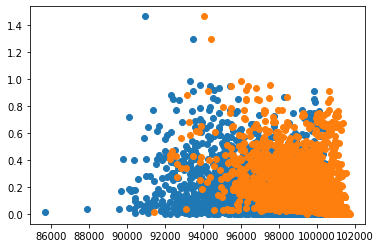

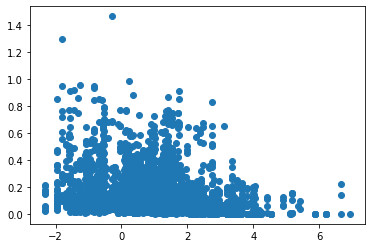

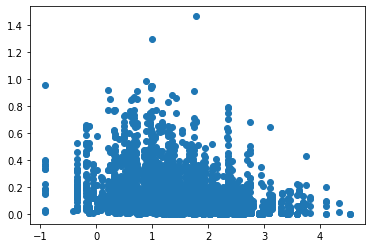

In [114]:
plt.scatter(max_mws[non0],peaks[non0])
plt.scatter(ks_mws[non0],peaks[non0])
plt.figure()
plt.scatter(min_mwr[non0],peaks[non0])
plt.scatter(ks_mwr[non0],peaks[non0])
plt.figure()
plt.scatter(min_cp[non0],peaks[non0])
plt.scatter(ks_cp[non0],peaks[non0])
plt.figure()
plt.scatter(ks_zonal_wind[non0],peaks[non0])
plt.figure()
plt.scatter(ks_meridional_wind[non0],peaks[non0])

(array([ 402., 1461., 1159.,  581.,  348.,  192.,   98.,   37.,   17.,
           9.]),
 array([ 5.56844699, 12.47666293, 19.38487886, 26.2930948 , 33.20131074,
        40.10952667, 47.01774261, 53.92595855, 60.83417448, 67.74239042,
        74.65060636]),
 <BarContainer object of 10 artists>)

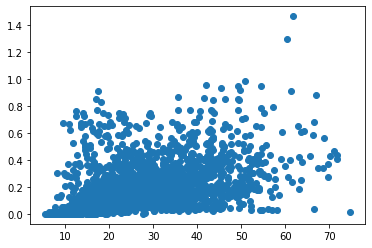

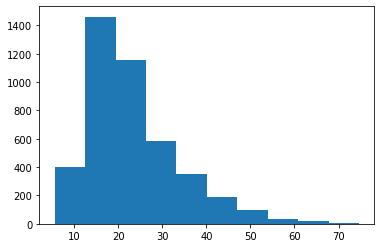

In [290]:
plt.scatter(ks_mws[non0],peaks[non0])
plt.figure()
plt.hist(ks_mws[non0])



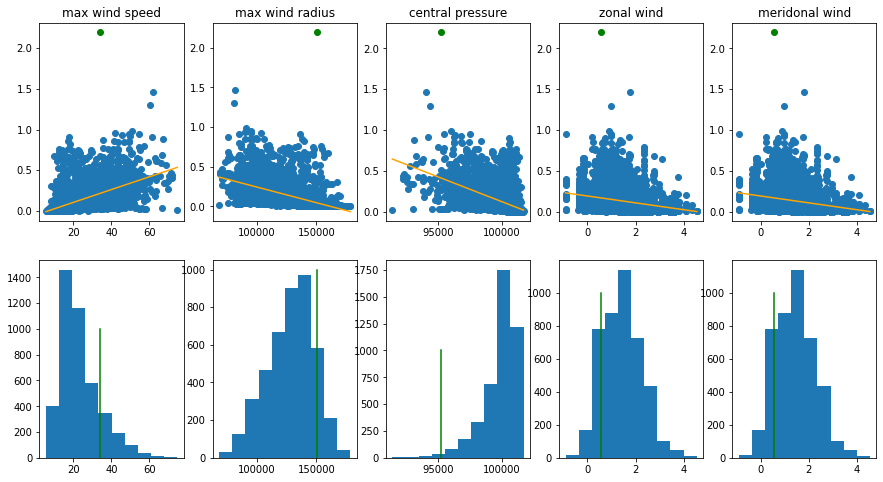

In [331]:
import scipy.stats
from sklearn.linear_model import LinearRegression
X_ks = np.array([ks_mws[non0],ks_mwr[non0],ks_cp[non0],ks_zonal_wind[non0],ks_meridional_wind[non0]]).transpose()
y = peaks[non0]
#for i in range(X.shape[1]):
#    print(scipy.stats.pearsonr(X[:,i],y)[0])

titles = ['max wind speed', 'max wind radius', 'central pressure', 'zonal wind', 'meridonal wind']
    
fig, axs = plt.subplots(2, 5, figsize=(15,8))

for i in range(X_ks.shape[1]):
    axs[0, i].scatter(X_ks[:,i],y)
    axs[1, i].hist(X_ks[:,i])
    reg_i = LinearRegression().fit(X_ks[:,i].reshape(-1, 1), y)
    x = np.linspace(np.nanmin(X_ks[:,i]),np.nanmax(X_ks[:,i]),100)
    axs[0, i].plot(x,x*reg_i.coef_[0]+reg_i.intercept_,color = 'orange')
    axs[0, i].set_title(titles[i])
    
    axs[0, i].scatter(sandy_params[i],2.2, color = 'green')
    axs[1, i].plot(sandy_params[i]*np.ones(10),np.linspace(0,1000,10),color = 'green')


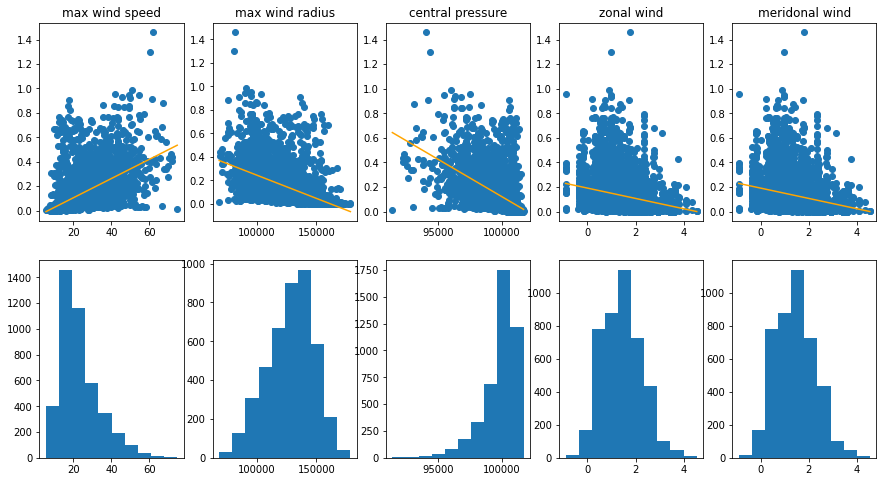

In [449]:
import scipy.stats
from sklearn.linear_model import LinearRegression
X_ks = np.array([ks_mws[non0],ks_mwr[non0],ks_cp[non0],ks_zonal_wind[non0],ks_meridional_wind[non0]]).transpose()
y = peaks[non0]
#for i in range(X.shape[1]):
#    print(scipy.stats.pearsonr(X[:,i],y)[0])

titles = ['max wind speed', 'max wind radius', 'central pressure', 'zonal wind', 'meridonal wind']
    
fig, axs = plt.subplots(2, 5, figsize=(15,8))

for i in range(X_ks.shape[1]):
    axs[0, i].scatter(X_ks[:,i],y)
    axs[1, i].hist(X_ks[:,i])
    reg_i = LinearRegression().fit(X_ks[:,i].reshape(-1, 1), y)
    x = np.linspace(np.nanmin(X_ks[:,i]),np.nanmax(X_ks[:,i]),100)
    axs[0, i].plot(x,x*reg_i.coef_[0]+reg_i.intercept_,color = 'orange')
    axs[0, i].set_title(titles[i])



In [110]:
X = np.array([max_mws[non0],ks_mws[non0],min_mwr[non0],ks_mwr[non0],min_cp[non0],ks_cp[non0],ks_zonal_wind[non0],ks_meridional_wind[non0]]).transpose()
print(X.shape)


(4304, 8)


In [111]:
min(X[:,3])

68325.63199774225

In [112]:
from sklearn.linear_model import LinearRegression
y = peaks[non0]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)

0.3788842215162184
[ 7.02584802e-03  3.39236573e-02  1.34442762e-06  5.62810006e-06
  3.18252685e-05  1.32093285e-04 -2.83807732e-03 -2.73790238e-02]


In [113]:
import scipy.stats
for i in range(X.shape[1]):
    print(scipy.stats.pearsonr(X[:,i],y)[0])

0.32666965580773727
0.5614924964808582
-0.10553413058492182
-0.5259824852128755
-0.3208080540193903
-0.5588626558613281
-0.26833812174674376
-0.23181091711858232


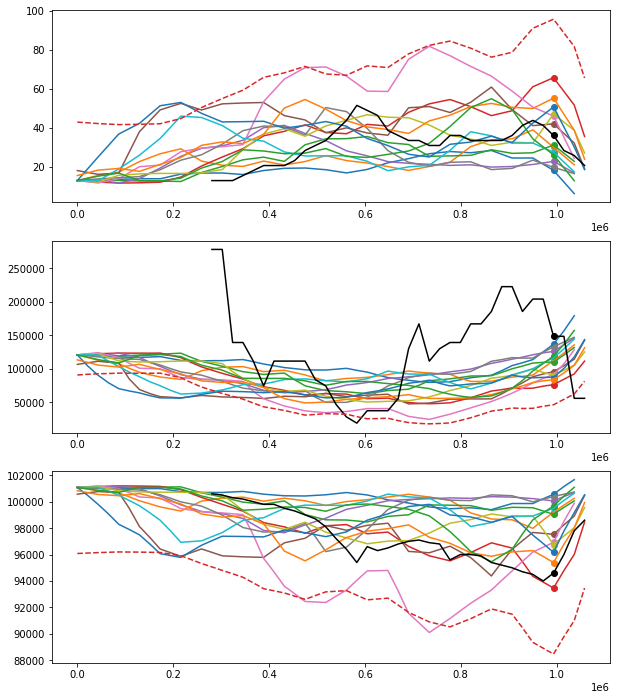

In [427]:
fig, axs = plt.subplots(3, 1, figsize=(10,12))
for i in range(1842,1855):
    a = storms_list[i]
    for i in range(3):
        axs[i].plot(a[:,0],a[:,i+3])
        axs[i].scatter(a[-4,0],a[-4,i+3])
   
t = a[-4,0]
a = sandy
for i in range(3):
    axs[i].plot(a[:,0]+t,a[:,i+3], color = 'k')
    axs[i].scatter(a[-4,0]+t,a[-4,i+3], color = 'k')

a = storms_list[1845]
extra = [30,-3e4,-5e3]
for i in range(3):
        axs[i].plot(a[:,0],a[:,i+3]+extra[i], '--')
        #axs[i].scatter(a[-4,0],a[-4,i+3])


Text(0, 0.5, 'central pressure')

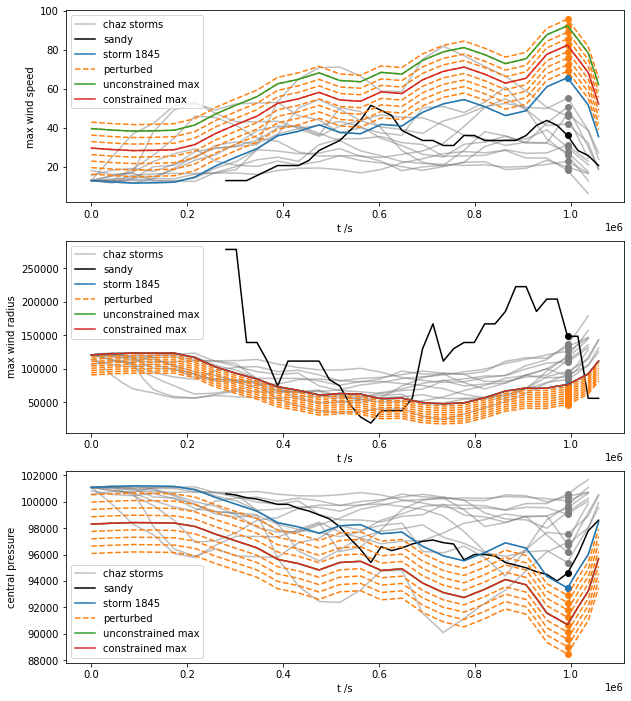

In [476]:
fig, axs = plt.subplots(3, 1, figsize=(10,12))
label = ''
for i in range(1842,1855):
    a = storms_list[i]
    if i == 1854:
        label = 'chaz storms'
    for i in range(3):
        axs[i].plot(a[:,0],a[:,i+3], color = 'tab:grey', alpha = 0.5, label = label)
        axs[i].scatter(a[-4,0],a[-4,i+3], color = 'tab:grey')
   
t = a[-4,0]
a = sandy
for i in range(3):
    axs[i].plot(a[:,0]+t,a[:,i+3], color = 'k', label = 'sandy')
    axs[i].scatter(a[-4,0]+t,a[-4,i+3], color = 'k')

#a = storms_list[1845]
#extra = [30,-3e4,-5e3]
#for i in range(3):
#        axs[i].plot(a[:,0],a[:,i+3]+extra[i], '--')
        #axs[i].scatter(a[-4,0],a[-4,i+3])
a = storms_list[1845]
deltas = [np.linspace(0,30,10),np.linspace(0,-3e4,10),np.linspace(0,-5e3,10)]
for i in range(10):
    lstyle = 'dashed'
    label = ['storm 1845','perturbed','','','','','','','','']
    color = 'tab:orange'
    if i == 0:
        lstyle = 'solid'
        color = 'tab:blue'
    for j in range(3):
        axs[j].plot(a[:,0],a[:,j+3]+deltas[j][i],linestyle = lstyle, color = color, label = label[i])
        axs[j].scatter(a[-4,0],a[-4,j+3]+deltas[j][i], color = color)
        #axs[j].scatter(a[-4,0],a[-4,j+3])


n = 0
c_max = 0
u_max = 0
cmax_args = [0,0,0]
cmax_n = []
umax_args = [0,0,0]
umax_n = []

peaks_perturbed = np.loadtxt('../peaks3_perturbed.txt')

for i, delta_mws in enumerate(np.linspace(0,30,10)):
    for j, delta_mwr in enumerate(np.linspace(0,-3e4,10)):
        for k, delta_cp in enumerate(np.linspace(0,-5e3,10)):
            if i+j+k<=10:
                if peaks_perturbed[n] > c_max:
                    c_max = peaks_perturbed[n]
                    cmax_args = [i,j,k]
                    cmax_n = n
            if peaks_perturbed[n] > u_max:
                u_max = peaks_perturbed[n]
                umax_args = [i,j,k]
                umax_n = n
            n += 1
for j in range(3):
    axs[j].plot(a[:,0],a[:,j+3]+deltas[j][umax_args[j]], color = 'tab:green', label = 'unconstrained max')
for j in range(3):
    axs[j].plot(a[:,0],a[:,j+3]+deltas[j][cmax_args[j]], color = 'tab:red', label = 'constrained max')
    
for i in range(3):
    axs[i].set_xlabel('t /s')
    axs[i].legend()
axs[0].set_ylabel('max wind speed')
axs[1].set_ylabel('max wind radius')
axs[2].set_ylabel('central pressure')


In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,12))
a = storms_list[1845]
deltas = [np.linspace(0,30,10),np.linspace(0,-3e4,10),np.linspace(0,-5e3,10)]
for i in range(10):
    lstyle = 'dashed'
    if i == 0:
        lstyle = 'solid'
    for j in range(3):
        axs[j].plot(a[:,0],a[:,j+3]+deltas[j][i],linestyle = lstyle)
        #axs[j].scatter(a[-4,0],a[-4,j+3])

In [429]:
perturbed_storms = []
for delta_mws in np.linspace(0,30,10):
    for delta_mwr in np.linspace(0,-3e4,10):
        for delta_cp in np.linspace(0,-5e3,10):
            s = storms_list[1845].copy()
            s[:,3] += delta_mws
            s[:,4] += delta_mwr
            s[:,5] += delta_cp
            perturbed_storms.append(s)

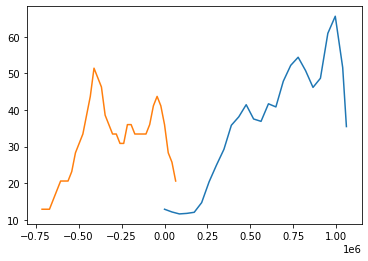

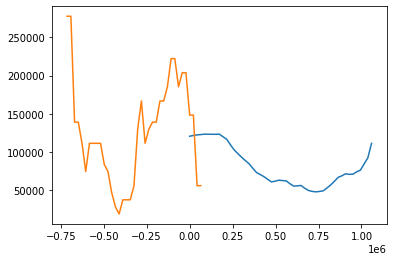

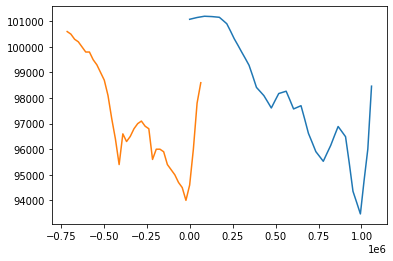

In [349]:
a = storms_list[1845]
plt.plot(a[:,0],a[:,3])
plt.plot(sandy[:,0],sandy[:,3])
plt.figure()
plt.plot(a[:,0],a[:,4])
plt.plot(sandy[:,0],sandy[:,4])
plt.figure()
plt.plot(a[:,0],a[:,5])
plt.plot(sandy[:,0],sandy[:,5])

In [222]:
X_track_list = []
y_track_list = []
for i in range(4000,8500):
    a = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
    l_arg = np.argmin(np.sum((a[:,1:3]-nyc)**2,axis =1))
    s = a.copy()
    for j in range(s.shape[0]):
        for k in range(s.shape[1]):
            if np.isnan(s[j,k]):
                s[j,k] = s[j-1,k]
    x_i = s[(l_arg-9):(l_arg+3),1:].flatten()
    if len(x_i) == 72 and peaks[i-4000]>0.0:
        X_track_list.append(x_i)
        y_track_list.append(peaks[i-4000])

In [223]:
X_track = np.array(X_track_list)
y_track = np.array(y_track_list)

In [224]:
print(X_track.shape)

(4012, 72)


In [225]:
a[(l_arg-8):(l_arg+3),1:].shape

(11, 6)

In [230]:
reg2 = LinearRegression().fit(X_track, y_track)
print(reg2.score(X_track, y_track))
split = int(0.8*len(X_track))
reg3 = LinearRegression().fit(X_track[:split], y_track[:split])
print(reg3.score(X_track[:split], y_track[:split]))
print(reg3.score(X_track[split:], y_track[split:]))
#print(reg2.coef_)

0.44010115069210043
0.44833949047251725
0.34206918782501416


In [117]:
np.sum((a[:,1:3]-nyc)**2,axis =1)

array([276.75039184, 259.91685005, 243.38721424, 217.08508402,
       189.55363221, 161.68796979, 127.18149531,  96.42372297,
        65.96562514,  39.48333286,  18.11138354,   4.74973919,
         1.47425627,   8.17497141,  24.35182677,  48.71016313,
        78.76452098, 114.07141447, 154.99438094])

In [237]:
from sklearn.svm import SVR
split = int(0.9*len(X_track))
svr_rbf = SVR(kernel='rbf', C=1000, gamma='scale',epsilon = 0.1)
svr_rbf.fit(X_track[:split], y_track[:split])
print("svr")
print(svr_rbf.score(X_track[:split], y_track[:split]))
print(svr_rbf.score(X_track[split:], y_track[split:]))


svr
0.36717225945242715
0.4169781620655225


(array([3.045e+03, 7.740e+02, 2.740e+02, 1.110e+02, 6.200e+01, 2.700e+01,
        9.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([9.92827300e-05, 1.46316754e-01, 2.92534226e-01, 4.38751698e-01,
        5.84969170e-01, 7.31186641e-01, 8.77404113e-01, 1.02362158e+00,
        1.16983906e+00, 1.31605653e+00, 1.46227400e+00]),
 <BarContainer object of 10 artists>)

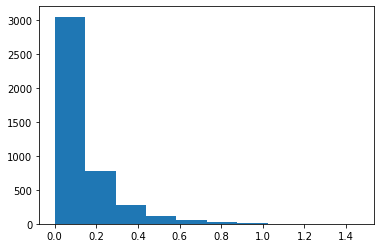

In [238]:
plt.hist(peaks[non0])

In [248]:
peaks_orig = peaks[non0].copy()
peaks_w_tide = peaks[non0].copy()
for k in ((np.cos(np.linspace(0,np.pi,20))+1)*1.524/2):
    peaks_w_tide = np.concatenate((peaks_w_tide,peaks_orig+k))

(array([2.3070e+04, 1.3250e+04, 1.1170e+04, 1.0497e+04, 1.4120e+04,
        1.5896e+04, 1.9330e+03, 4.0400e+02, 3.4000e+01, 1.0000e+01]),
 array([9.92827300e-05, 2.98716754e-01, 5.97334226e-01, 8.95951698e-01,
        1.19456917e+00, 1.49318664e+00, 1.79180411e+00, 2.09042158e+00,
        2.38903906e+00, 2.68765653e+00, 2.98627400e+00]),
 <BarContainer object of 10 artists>)

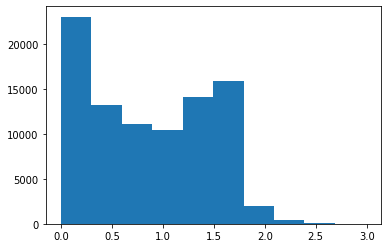

In [249]:
plt.hist(peaks_w_tide)

In [282]:
tide = lambda t : (np.sin(2*np.pi*t/12.0)+1.0)*0.75

3.0


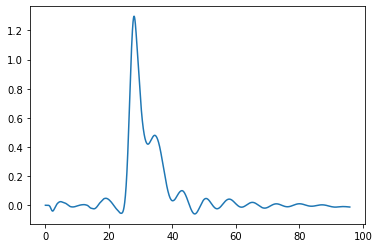

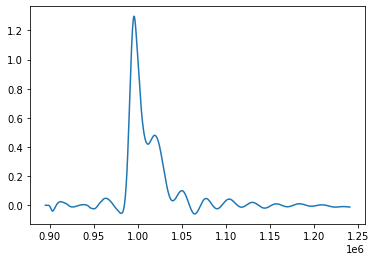

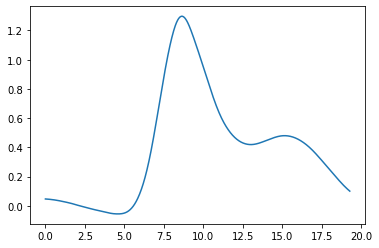

In [445]:
i = 5845
address = 'chazoutputs/outputscopychazruns/'+str(i).zfill(4)+'_output/gauge00013.txt'
output = np.loadtxt(address, skiprows = 10, usecols = [0,1,5])
storm = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
trange = (output[:,1]-output[0,1])/(3600) 
plt.plot(trange,output[:,2])
plt.figure()
plt.plot(output[:,1],output[:,2])
plt.figure()
plt.plot((output[1000:2000,1]-output[1000,1])/3600,output[1000:2000,2])
print(np.max(output[:,0]))
#plt.plot(trange,tide(trange))
#plt.plot(trange,(output[:,1]+tide(trange)))
#l_arg = np.argmin(np.sum((storm[:,1:3]-nyc)**2,axis =1))
#plt.plot(storm[(l_arg-9):(l_arg+3),0],np.ones(12))

In [309]:
peaks_rp = np.loadtxt('../peaks3_rp.txt')

(array([316., 126.,  68.,  40.,  13.,   9.,  10.,   4.,   7.,   7.]),
 array([0.0109573 , 0.08342587, 0.15589444, 0.22836301, 0.30083158,
        0.37330015, 0.44576872, 0.51823729, 0.59070586, 0.66317443,
        0.735643  ]),
 <BarContainer object of 10 artists>)

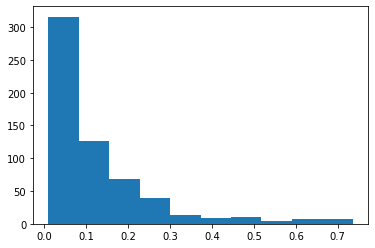

In [310]:
plt.hist(peaks_rp)

In [371]:
rp_list = []
for i in range(9000,9700):
    a = np.genfromtxt("./data/storms/geoclaw-longisland-tracks/LongIsland_"+str(i)+".storm", skip_header = 3)
    rp_list.append(a)

In [372]:
rp_argsorted = np.argsort(peaks_rp)

In [393]:
import matplotlib.pylab as pl

0.735643
0.7353247
0.7258614
0.7125179
0.6861934
0.6837946
0.6660113
0.6593309
0.6572183
0.6503094
0.6375377
0.6333308
0.6159425
0.6050166
0.5883829
0.578609
0.5713348
0.5486557
0.515703
0.4813137
0.4748121
0.4724288
0.4724288
0.465022
0.4580034
0.4559951
0.4523068
0.45161
0.4456725
0.4316643
0.4271999
0.421744
0.4174076
0.407035
0.4022768
0.3875422
0.3774864
0.3634979
0.3621414
0.3601405
0.3577433
0.356569
0.3414938
0.3398994
0.339262
0.3276805
0.3076944
0.3075512
0.3066133
0.3041915
0.2974864
0.2973532
0.2971177
0.2969384
0.2964308
0.2959022
0.2942119
0.2908693
0.2890463
0.2862638
0.2854797
0.2853704
0.2840225
0.2833515
0.2824373
0.2799744
0.2768618
0.2749865
0.2706342
0.2671956
0.2639942
0.2564848
0.2549509
0.2549509
0.2548234
0.2504145
0.2488544
0.2471019
0.2465081
0.2463239
0.2463126
0.2454106
0.2425374
0.2375874
0.2367354
0.2366485
0.2359188
0.2334622
0.2303661
0.2289761
0.227371
0.2257592
0.2215167
0.2210533
0.2186682
0.2160974
0.2139913
0.2139913
0.211489


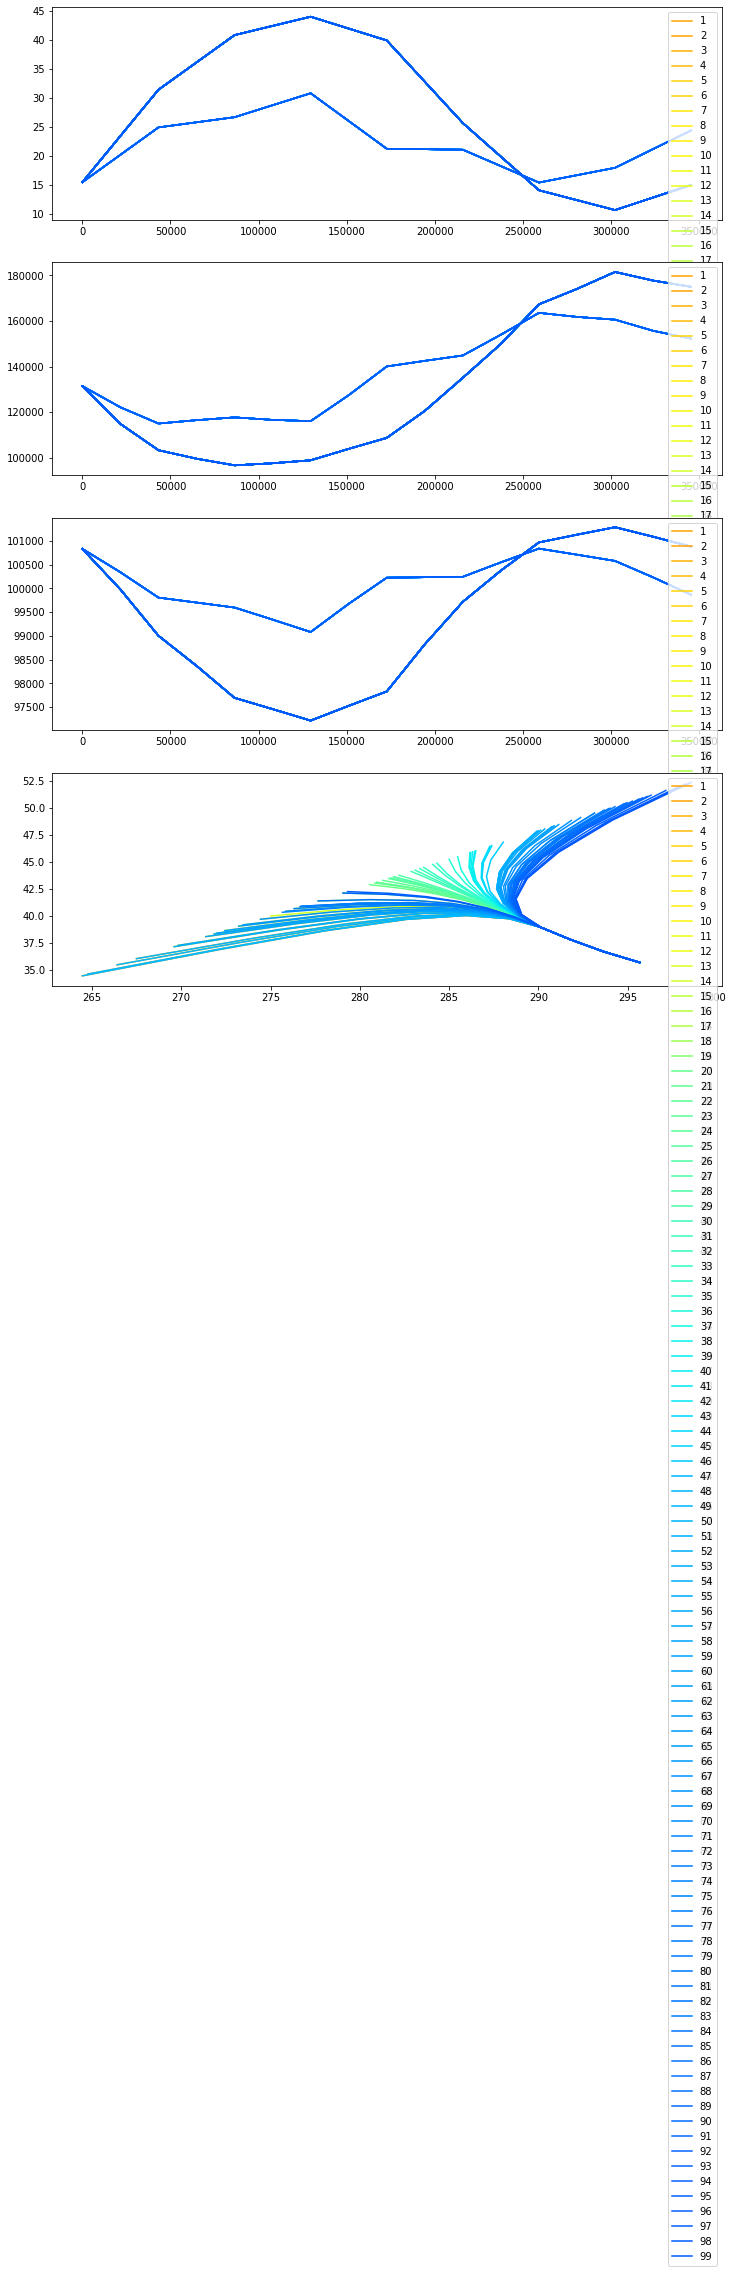

In [479]:
fig, axs = plt.subplots(4, 1, figsize=(12,18))

#colors = pl.cm.jet(np.linspace(0,1,100))

for i in range(1,100):
    print(peaks_rp[rp_argsorted[-i]])
    a = rp_list[rp_argsorted[-i]]
    axs[0].plot(a[:,0],a[:,3], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    axs[1].plot(a[:,0],a[:,4], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    axs[2].plot(a[:,0],a[:,5], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    axs[3].plot(a[:10,1],a[:10,2], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    
for i in range(4):
    axs[i].legend()
    
axs[3].scatter(nyc[0],nyc[1])

0.08974373
0.02254583
0.2210533
0.04801058
0.05549162
0.08824442
0.1847765
0.06074028
0.03887755
0.7353247
0.1862191
0.1170867
0.03921556
0.03847805
0.1962679
0.5486557
0.05822419
0.1060979
0.03749457
0.06368029


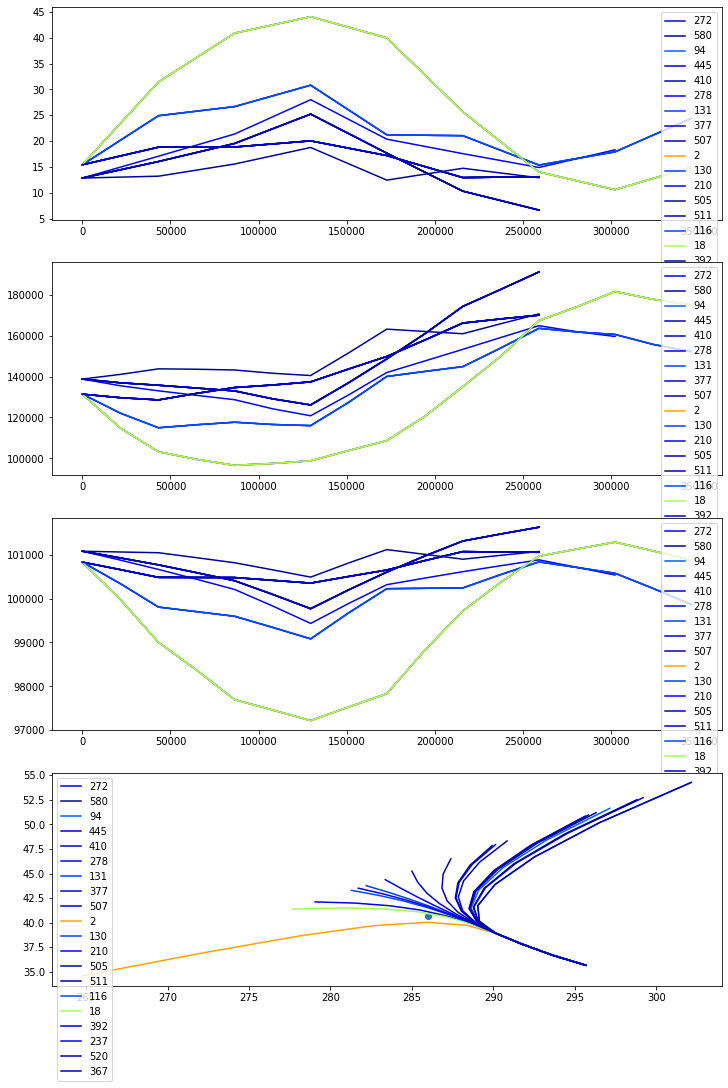

In [399]:
fig, axs = plt.subplots(4, 1, figsize=(12,18))

#colors = pl.cm.jet(np.linspace(0,1,100))

for i in np.random.randint(600, size = 20):
    print(peaks_rp[rp_argsorted[-i]])
    a = rp_list[rp_argsorted[-i]]
    axs[0].plot(a[:,0],a[:,3], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    axs[1].plot(a[:,0],a[:,4], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    axs[2].plot(a[:,0],a[:,5], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    axs[3].plot(a[:10,1],a[:10,2], label = str(i), color = pl.cm.jet(peaks_rp[rp_argsorted[-i]]))
    
for i in range(4):
    axs[i].legend()
    
axs[3].scatter(nyc[0],nyc[1])

In [401]:
import numpy as np
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import sklearn
from sklearn.linear_model import LinearRegression
#import sklearn.gaussian_process as gp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

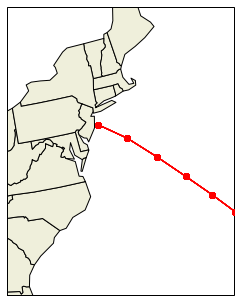

In [436]:
#s5845 = np.genfromtxt("./data/storms/LongIsland_5845.storm",skip_header = 3)
#s7035 = np.genfromtxt("./data/storms/LongIsland_7035.storm",skip_header = 3)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 30, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)

for s in storms_list[1842:1855]:
    lons = s[:-3,1]-360
    lats = s[:-3,2]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'red')
    
    ax.scatter(lons,lats,transform=ccrs.PlateCarree(), color = 'red', zorder = 3)

plt.show()

In [437]:
storms_list[1845][-6,0]

950400.0